<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/DistribuicaoEstatistica/Gr%C3%A1fico_de_Individuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neste Notebook, nosso objetivo é entender como aplicar o Gráfico de Individuais.

### 1 - Quais situações são recomendadas a sua utilização;
#### Quando se quer monitorar uma característica contínua medida individualmente, e não há possibilidade de agrupar dados (ex: tempo de atendimento por cliente, temperatura por hora).

### 2 - Com quais tipos de variáveis devemos trabalhar nesse tipo de gráfico;
#### Variável quantitativa contínua (ex: tempo, peso, comprimento).

### 3 - Como construir o gráfico;

#### - Plote cada ponto medido individualmente.

#### - Calcule a média (linha central).

#### - Calcule os limites superior/inferior (LSC/LIC) usando desvio padrão ou fórmula do gráfico de controle.

####  - Não há subgrupos; o desvio padrão é estimado usando a média do desvio entre pontos consecutivos (média dos "moving ranges").

### 4 - Como explicar o gráfico;
#### É um gráfico que mostra a variabilidade ponto a ponto, permitindo identificar tendências, instabilidades, outliers ou qualquer comportamento fora do comum em processos contínuos.

#### 📌 "Aqui cada ponto fala por si. O gráfico de individuais é o que você usa quando não tem como agrupar dados, mas quer entender a dança estatística do seu processo em tempo real."

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [76]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/DistribuicaoEstatistica/base_dados/Green_Belt_FM2S_Demo_4.xlsx?raw=True'
dados = pd.read_excel(url)
dados.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [77]:
# Aqui o Pandas "prepara" o arquivo para ver as abas
excel_file = pd.ExcelFile(url)
nomes_das_abas = excel_file.sheet_names
print(nomes_das_abas)

['GC - Var. Contínuas', 'GC - Var. Contagem', 'GC - Var. Categóricas']


In [ ]:
# Lendo a primeira aba da planilha
dados_aba1 = pd.read_excel(url, sheet_name=nomes_das_abas[0]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='GC - Var. Contínuas')
dados_aba1.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


Realizando o teste (avaliação) de Normalidade para nossos dados!


🧪 Teste de Shapiro-Wilk | Estágio A
    Estatística W: 0.9855
    Valor-p: 0.7947
    ✅ Os dados provavelmente seguem uma distribuição normal.

🧪 Teste de Shapiro-Wilk | Estágio B
    Estatística W: 0.9857
    Valor-p: 0.6650
    ✅ Os dados provavelmente seguem uma distribuição normal.


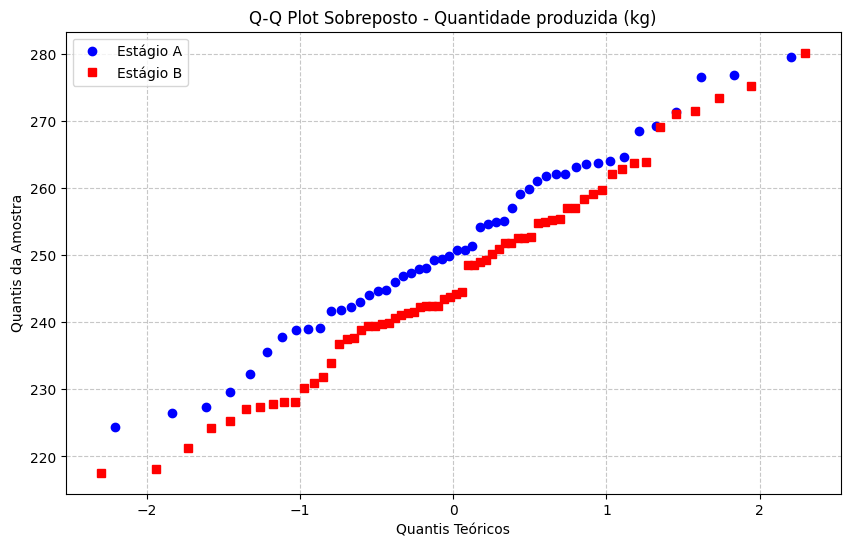

In [81]:
variavel = 'Quantidade produzida (kg)'
estagios = ['A', 'B']  # ou use dados_aba1['Estágio'].unique()

plt.figure(figsize=(10, 6))

for estagio, cor, marcador in zip(estagios, ['blue', 'red'], ['o', 's']):
    # Pega os dados reais para o estágio atual
    dados = dados_aba1[dados_aba1['Estágio'] == estagio][variavel].dropna()
    
    # Plota o Q-Q Plot com pontos coloridos por estágio
    osm, osr = stats.probplot(dados, dist="norm", fit=False)
    plt.plot(osm, osr, marker=marcador, linestyle='', label=f'Estágio {estagio}', color=cor)
    
    # Faz o teste de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(dados)
    print(f"\n🧪 Teste de Shapiro-Wilk | Estágio {estagio}")
    print(f"    Estatística W: {stat_shapiro:.4f}")
    print(f"    Valor-p: {p_shapiro:.4f}")
    
    if p_shapiro > 0.05:
        print("    ✅ Os dados provavelmente seguem uma distribuição normal.")
    else:
        print("    ❌ Os dados NÃO seguem uma distribuição normal.")

plt.title(f'Q-Q Plot Sobreposto - {variavel}')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


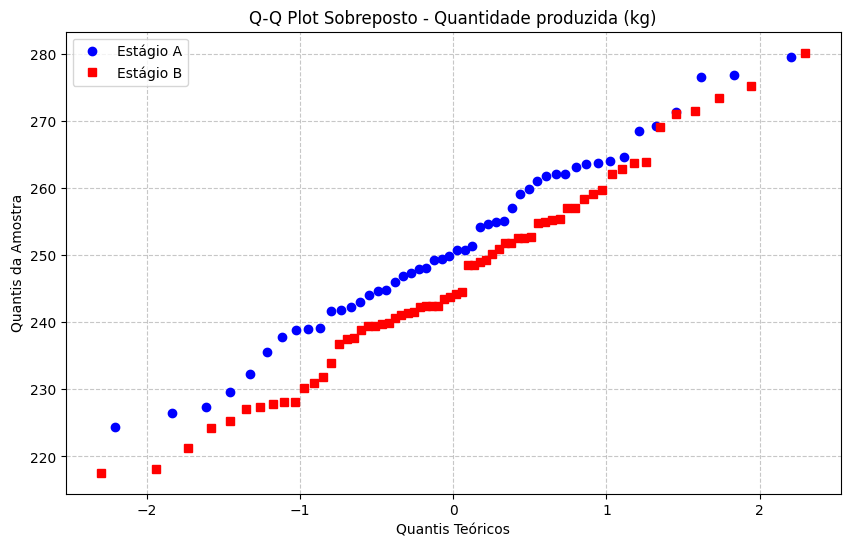

,Estágio,Média,DesvPad,N,Shapiro-W,p-valor (Shapiro),AD
0,A,251.49,13.36,50,0.9855,0.7947,0.1954
1,B,246.17,14.55,64,0.9857,0.6650,0.2547


In [82]:
variavel = 'Quantidade produzida (kg)'
estagios = ['A', 'B']  # ou list(dados_aba1['Estágio'].unique())

resultados = []

plt.figure(figsize=(10, 6))

for estagio, cor, marcador in zip(estagios, ['blue', 'red'], ['o', 's']):
    dados = dados_aba1[dados_aba1['Estágio'] == estagio][variavel].dropna()
    
    # Q-Q Plot
    osm, osr = stats.probplot(dados, dist="norm", fit=False)
    plt.plot(osm, osr, marker=marcador, linestyle='', label=f'Estágio {estagio}', color=cor)

    # Teste de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(dados)

    # Teste de Anderson-Darling
    ad_result = stats.anderson(dados, dist='norm')
    ad_stat = ad_result.statistic
    # A interpretação do AD é diferente: quanto menor, mais normal. Não há p-valor direto.

    # Dados estatísticos adicionais
    media = dados.mean()
    desvio = dados.std()
    n = len(dados)

    resultados.append({
        'Estágio': estagio,
        'Média': round(media, 2),
        'DesvPad': round(desvio, 2),
        'N': n,
        'Shapiro-W': round(stat_shapiro, 4),
        'p-valor (Shapiro)': round(p_shapiro, 4),
        'AD': round(ad_stat, 4)
    })

plt.title(f'Q-Q Plot Sobreposto - {variavel}')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Exibir resultados como tabela
df_resultados = pd.DataFrame(resultados)
display(df_resultados)


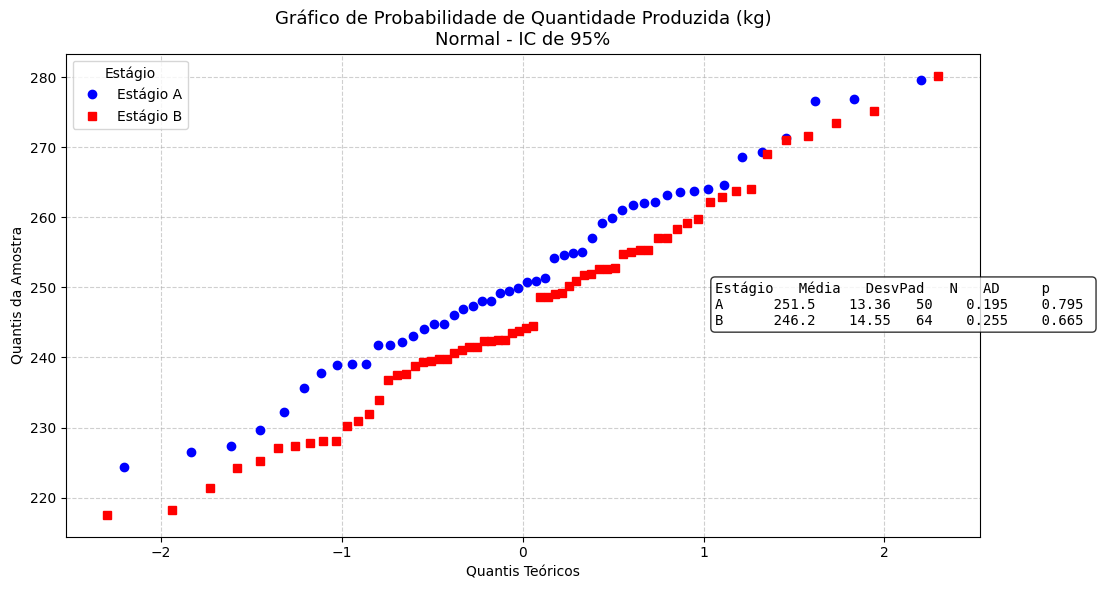

In [83]:
variavel = 'Quantidade produzida (kg)'
estagios = ['A', 'B']
cores = ['blue', 'red']
marcadores = ['o', 's']
legenda_texto = []

fig, ax = plt.subplots(figsize=(10, 6))

for estagio, cor, marcador in zip(estagios, cores, marcadores):
    grupo = dados_aba1[dados_aba1['Estágio'] == estagio][variavel].dropna()
    
    
    # Q-Q Plot
    osm, osr = stats.probplot(grupo, dist="norm", fit=False)
    ax.plot(osm, osr, marker=marcador, linestyle='', label=f'Estágio {estagio}', color=cor)

    # Estatísticas
    media = grupo.mean()
    desvio = grupo.std()
    n = len(grupo)

    # Testes de normalidade
    stat_shapiro, p_shapiro = stats.shapiro(grupo)
    ad_stat = stats.anderson(grupo, dist='norm').statistic

    # Montagem estilo Minitab
    legenda_texto.append(f"{estagio:<5} {media:>6.1f}   {desvio:>6.2f}   {n:<3}   {ad_stat:<6.3f}   {p_shapiro:<6.3f}")

# Gráfico
ax.set_title('Gráfico de Probabilidade de Quantidade Produzida (kg)\nNormal - IC de 95%', fontsize=13)
ax.set_xlabel('Quantis Teóricos')
ax.set_ylabel('Quantis da Amostra')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title='Estágio')

# Legenda lateral
legenda_formatada = "Estágio   Média   DesvPad   N   AD     p\n" + "\n".join(legenda_texto)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.gcf().text(0.72, 0.45, legenda_formatada, fontsize=10, bbox=props, family='monospace')

plt.tight_layout()
plt.show()


In [85]:
print("Nomes das colunas no DataFrame:", dados_aba1.columns.tolist())
print("\n" + "="*30 + "\n")

Nomes das colunas no DataFrame: ['Data', 'Quantidade produzida (kg)', 'Estágio']




DataFrame 'dados_aba1' (original, primeiras 5 linhas):
        Data  Quantidade produzida (kg) Estágio Data Formatada
0 1990-02-01                     237.74       A     01-02-1990
1 1990-02-02                     254.92       A     02-02-1990
2 1990-02-03                     246.85       A     03-02-1990
3 1990-02-04                     257.09       A     04-02-1990
4 1990-02-05                     226.47       A     05-02-1990
Nomes das colunas no DataFrame: ['Data', 'Quantidade produzida (kg)', 'Estágio', 'Data Formatada']


DataFrame 'dados_aba1' após tratamentos (primeiras 5 linhas):
        Data  Quantidade produzida (kg) Estágio Data Formatada
0 1990-02-01                     237.74       A     01-02-1990
1 1990-02-02                     254.92       A     02-02-1990
2 1990-02-03                     246.85       A     03-02-1990
3 1990-02-04                     257.09       A     04-02-1990
4 1990-02-05                     226.47       A     05-02-1990


Média Geral (X-barra): 2

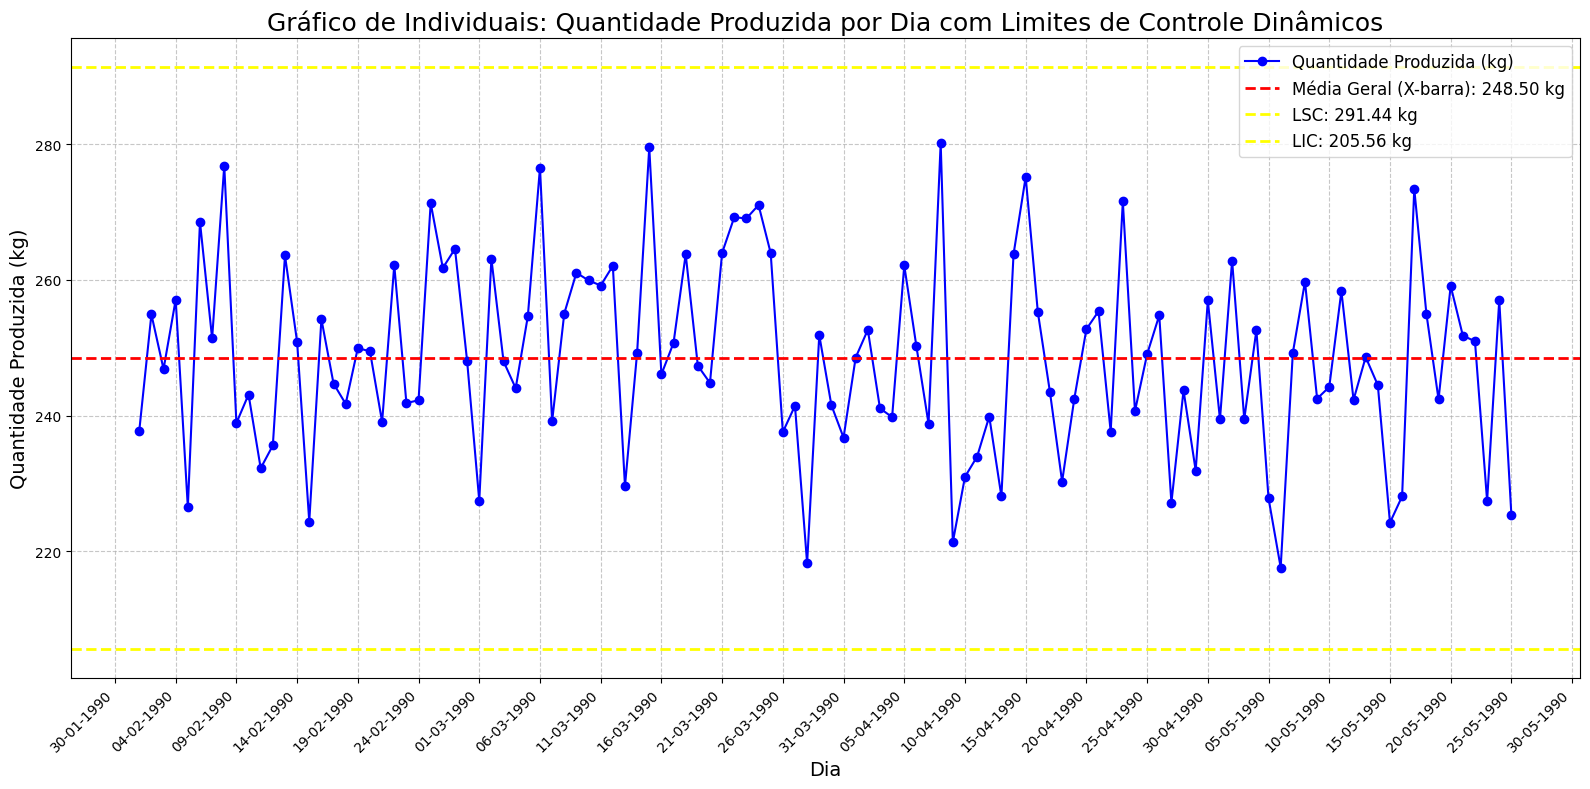

In [89]:
import matplotlib.dates as mdates # Importe para manipulação de datas no Matplotlib
import numpy as np

print("DataFrame 'dados_aba1' (original, primeiras 5 linhas):")
print(dados_aba1.head())
print("Nomes das colunas no DataFrame:", dados_aba1.columns.tolist())
print("\n" + "="*30 + "\n")

# 1. Tratamento da coluna 'Data'
# Garante que a coluna 'Data' é do tipo datetime.
dados_aba1['Data'] = pd.to_datetime(dados_aba1['Data'])

# 2. Tratamento da coluna 'Quantidade produzida (kg)' para duas casas decimais
dados_aba1['Quantidade produzida (kg)'] = dados_aba1['Quantidade produzida (kg)'].round(2)

print("DataFrame 'dados_aba1' após tratamentos (primeiras 5 linhas):")
print(dados_aba1.head())
print("\n" + "="*30 + "\n")

# --- CÁLCULO DINÂMICO DOS LIMITES DE CONTROLE (LSC e LIC) ---

# Calcula a média geral (X-barra)
media_geral = dados_aba1['Quantidade produzida (kg)'].mean()

# Calcula a Amplitude Móvel (MR)
# A amplitude móvel é a diferença absoluta entre um valor e o seu predecessor.
# .abs() garante que a diferença seja sempre positiva.
# .shift(1) desloca a coluna em 1 posição para comparar o valor atual com o anterior.
dados_aba1['MR'] = dados_aba1['Quantidade produzida (kg)'].diff().abs()

# Calcula a Média da Amplitude Móvel (MR-barra)
# Excluímos o primeiro valor de MR, que é NaN (não tem predecessor).
mr_barra = dados_aba1['MR'].mean()

# Constante d2 para tamanho de subgrupo = 2 (para MR)
d2 = 1.128

# Calcula LSC e LIC
LSC = media_geral + 3 * (mr_barra / d2)
LIC = media_geral - 3 * (mr_barra / d2)

# Garante que LIC não seja negativo (limite inferior de produção não pode ser abaixo de zero)
LIC = max(0, LIC)

print(f"Média Geral (X-barra): {media_geral:.2f} kg")
print(f"Média da Amplitude Móvel (MR-barra): {mr_barra:.2f}")
print(f"LSC (Calculado): {LSC:.2f} kg")
print(f"LIC (Calculado): {LIC:.2f} kg")
print("\n" + "="*30 + "\n")

# --- FIM DO CÁLCULO DINÂMICO ---


# 4. Criação do Gráfico de Individuais
plt.figure(figsize=(16, 8)) # Aumenta o tamanho do gráfico para melhor visualização

# Plotar a linha dos valores individuais
# Usamos a coluna 'Data' original (datetime) para o eixo X para facilitar o controle de ticks de data.
plt.plot(dados_aba1['Data'], dados_aba1['Quantidade produzida (kg)'],
         marker='o',          # Adiciona marcadores nos pontos
         linestyle='-',       # Linha contínua
         color='blue',        # Cor da linha
         label='Quantidade Produzida (kg)')

# Adicionar a linha tracejada da média geral
plt.axhline(y=media_geral, color='red', linestyle='--', linewidth=2,
            label=f'Média Geral (X-barra): {media_geral:.2f} kg')

# Limite Superior de Controle (LSC) com a cor amarela
plt.axhline(y=LSC, color='yellow', linestyle='--', linewidth=2,
            label=f'LSC: {LSC:.2f} kg')

# Limite Inferior de Controle (LIC) com a cor amarela
plt.axhline(y=LIC, color='yellow', linestyle='--', linewidth=2,
            label=f'LIC: {LIC:.2f} kg')

# Configurações do gráfico
plt.title('Gráfico de Individuais: Quantidade Produzida por Dia com Limites de Controle Dinâmicos', fontsize=18)
plt.xlabel('Dia', fontsize=14)
plt.ylabel('Quantidade Produzida (kg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade ao gráfico
plt.legend(fontsize=12) # Mostra a legenda

# --- Ajuste para o intervalo de 10 dias no eixo X ---
# Define o localizador para exibir ticks a cada 10 dias
locator = mdates.DayLocator(interval=5)
plt.gca().xaxis.set_major_locator(locator)

# Define o formatador para exibir a data no formato "dd-mm-yyyy"
formatter = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()